In [1]:
import numpy as np
import pandas as pd
import scipy as sc
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt 
import string 
%matplotlib inline

Загружаем получившийся датасет

In [2]:
Analysis = pd.read_csv('Analysis.csv')
Analysis = Analysis.drop(['Unnamed: 0'], axis = 1)
Analysis.head()

,Name_in,DateTime_in,Found Location,Intake Type,Intake Condition,Animal Type_in,Age upon Intake,DateTime_out,Date of Birth,Outcome Type,Age upon Outcome,Breed_out,Color_out,Gender_in,Sterill_in,Sterill_out,group of age_in,days_of_stay,group of stay
0,1,2019-01-03 16:19:00,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,2 years,2019-01-08 15:11:00,2017-01-03 00:00:00,Transfer,2 years,Beagle Mix,Tricolor,Male,1,1,1-3 years,4,0-7 days
1,1,2015-07-05 12:59:00,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,8 years,2015-07-05 15:13:00,2007-07-05 00:00:00,Return to Owner,8 years,English Springer Spaniel,White/Liver,Female,1,1,7-9 years,0,0-7 days
2,1,2016-04-14 18:43:00,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,11 months,2016-04-21 17:17:00,2015-04-17 00:00:00,Return to Owner,1 year,Basenji Mix,Sable/White,Male,0,1,7-12 months,6,0-7 days
3,0,2013-10-21 07:59:00,Austin (TX),Stray,Sick,Cat,4 weeks,2013-10-21 11:39:00,2013-09-21 00:00:00,Transfer,4 weeks,Domestic Shorthair Mix,Calico,Female,0,0,1-6 weeks,0,0-7 days
4,1,2014-06-29 10:38:00,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,4 years,2014-07-02 14:16:00,2010-06-29 00:00:00,Return to Owner,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,Male,1,1,4-6 years,3,0-7 days


Разделим датасет на два: один - по собакам, второй - по кошкам

In [3]:
dog = Analysis[Analysis['Animal Type_in'] =='Dog']
cat = Analysis[Analysis['Animal Type_in'] =='Cat']

# Анализ факторов попадания в приют

Количество собак и кошек, попавших в приют

In [4]:
Analysis['Animal Type_in'].value_counts()

Dog    89818
Cat    45134
Name: Animal Type_in, dtype: int64

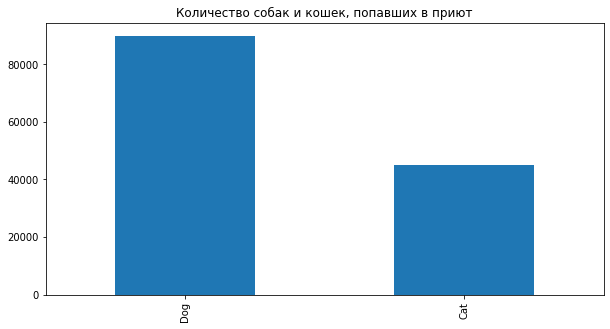

In [7]:
Analysis['Animal Type_in'].value_counts().plot(kind = 'bar', figsize = (10,5), title = 'Количество собак и кошек, попавших в приют')

In [10]:
print ((dog['Animal Type_in'].count()/Analysis['Animal Type_in'].count())* 100, '% собак в приюте')
print ((cat['Animal Type_in'].count()/Analysis['Animal Type_in'].count())* 100, '% кошек в приюте')

66.55551603533108 % собак в приюте
33.44448396466892 % кошек в приюте


Распределение количества собак и кошек по типу попадания в приют

In [23]:
dog['Intake Type'].value_counts()

Stray                 59360
Owner Surrender       20848
Public Assist          9413
Euthanasia Request      197
Name: Intake Type, dtype: int64

In [24]:
cat['Intake Type'].value_counts()

Stray                 34248
Owner Surrender        9753
Public Assist          1066
Euthanasia Request       67
Name: Intake Type, dtype: int64

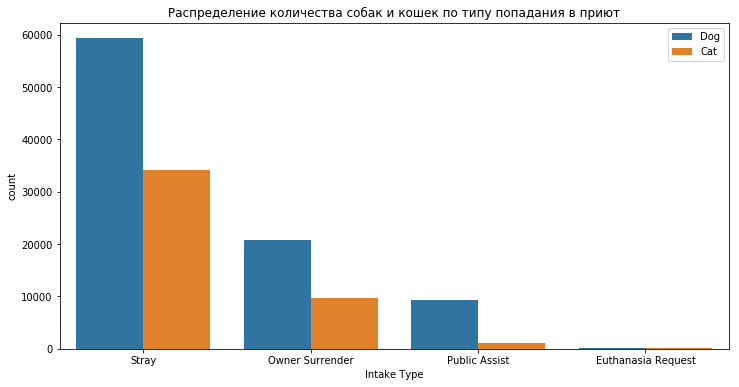

In [37]:
plt.figure (figsize = (12,6))
sns.countplot (data=Analysis, 
x = 'Intake Type',
hue = 'Animal Type_in')
plt.title('Распределение количества собак и кошек по типу попадания в приют')
plt.legend(loc = 'upper right')

In [28]:
#DOGS
dog_int = dog.groupby(['Intake Type'])['Intake Type'].count()

In [31]:
print (dog_int['Stray'].sum() / dog_int.sum() * 100, '% Подобраны с улицы')
print (dog_int['Owner Surrender'].sum() / dog_int.sum() * 100, '% Были сданы владельцем')
print (dog_int['Public Assist'].sum() / dog_int.sum() * 100, '% Принесли волонтеры')
print (dog_int['Euthanasia Request'].sum() / dog_int.sum() * 100, '% Запрос на эвтаназию')

66.08920260972188 % Подобраны с улицы
23.211383018993967 % Были сданы владельцем
10.480081943485715 % Принесли волонтеры
0.21933242779843687 % Запрос на эвтаназию


In [32]:
#CATS
cat_int = cat.groupby(['Intake Type'])['Intake Type'].count()

In [33]:
print (cat_int['Stray'].sum() / cat_int.sum() * 100, '% Подобраны с улицы')
print (cat_int['Owner Surrender'].sum() / cat_int.sum() * 100, '% Были сданы владельцем')
print (cat_int['Public Assist'].sum() / cat_int.sum() * 100, '% Принесли волонтеры')
print (cat_int['Euthanasia Request'].sum() / cat_int.sum() * 100, '% Запрос на эвтаназию')

75.88071077236674 % Подобраны с улицы
21.60898657331502 % Были сданы владельцем
2.361855807152036 % Принесли волонтеры
0.14844684716621617 % Запрос на эвтаназию


Количество особей мужского и женского пола у собак и кошек 

In [38]:
dog['Gender_in'].value_counts()

Male       49503
Female     39909
Unknown      406
Name: Gender_in, dtype: int64

In [39]:
cat['Gender_in'].value_counts()

Female     20972
Male       20478
Unknown     3684
Name: Gender_in, dtype: int64

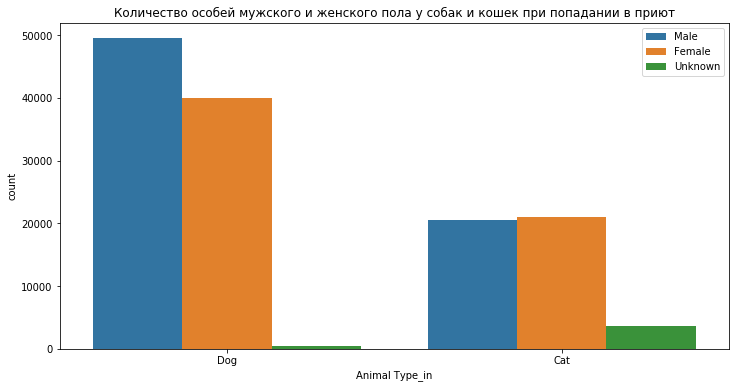

In [42]:
plt.figure (figsize = (12,6))
sns.countplot (data=Analysis, 
x = 'Animal Type_in',
hue = 'Gender_in')
plt.title('Количество особей мужского и женского пола у собак и кошек при попадании в приют')
plt.legend(loc = 'upper right')

In [12]:
dog_f = dog[dog['Gender_in'] =='Female']
dog_m = dog[dog['Gender_in'] =='Male']
cat_f = cat[cat['Gender_in'] =='Female']
cat_m = cat[cat['Gender_in'] =='Male']

In [63]:
print (dog_f['Gender_in'].count()/dog['Animal Type_in'].count() * 100, '% собак женского пола в приюте')
print (dog_m['Gender_in'].count()/dog['Animal Type_in'].count() * 100, '% собак мужского пола в приюте')
print (cat_f['Gender_in'].count()/cat['Animal Type_in'].count() * 100, '% кошек женского пола в приюте')
print (cat_m['Gender_in'].count()/cat['Animal Type_in'].count() * 100, '% кошек мужского пола в приюте')

44.4331871117148 % собак женского пола в приюте
55.11478768175644 % собак мужского пола в приюте
46.46607878761023 % кошек женского пола в приюте
45.37156024283245 % кошек мужского пола в приюте


Соотношение пола собак и кошек по типу попадания в приют

In [14]:
dog_f['Intake Type'].value_counts()

Stray                 26686
Owner Surrender       10005
Public Assist          3131
Euthanasia Request       87
Name: Intake Type, dtype: int64

In [15]:
dog_m['Intake Type'].value_counts()

Stray                 32377
Owner Surrender       10765
Public Assist          6257
Euthanasia Request      104
Name: Intake Type, dtype: int64

In [16]:
cat_f['Intake Type'].value_counts()

Stray                 15360
Owner Surrender        5107
Public Assist           469
Euthanasia Request       36
Name: Intake Type, dtype: int64

In [17]:
cat_m['Intake Type'].value_counts()

Stray                 15291
Owner Surrender        4595
Public Assist           564
Euthanasia Request       28
Name: Intake Type, dtype: int64

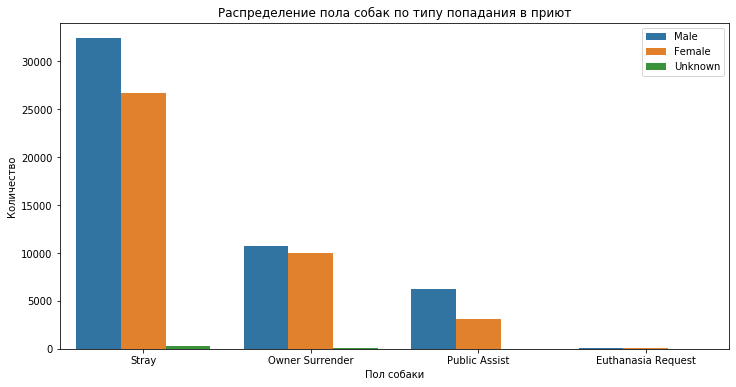

In [18]:
plt.figure (figsize = (12,6))
sns.countplot (data=dog, 
x = 'Intake Type',
hue = 'Gender_in')
plt.xlabel ('Пол собаки')
plt.ylabel ('Количество')
plt.title('Распределение пола собак по типу попадания в приют')
plt.legend(loc = 'upper right')

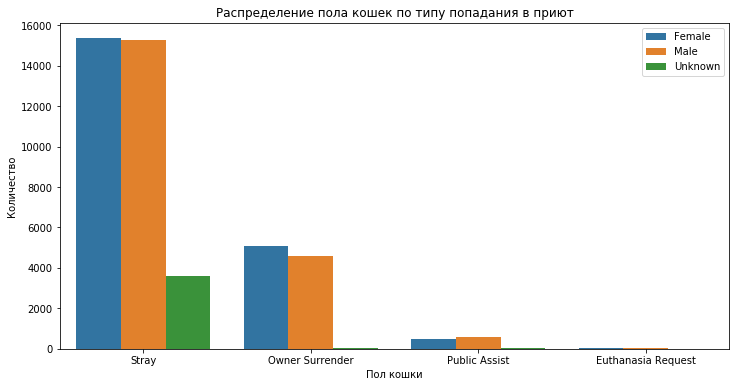

In [19]:
plt.figure (figsize = (12,6))
sns.countplot (data=cat, 
x = 'Intake Type',
hue = 'Gender_in')
plt.xlabel ('Пол кошки')
plt.ylabel ('Количество')
plt.title('Распределение пола кошек по типу попадания в приют')
plt.legend(loc = 'upper right')

In [20]:
dog_f_int = dog_f.groupby(['Intake Type'])['Intake Type'].count()
dog_m_int = dog_m.groupby(['Intake Type'])['Intake Type'].count()

In [22]:
print (dog_f_int['Stray'].sum() / dog_f_int.sum() * 100, '% Собак женского пола подобраны с улицы')
print (dog_f_int['Owner Surrender'].sum() / dog_f_int.sum() * 100, '% Собак женского пола были сданы владельцем')
print (dog_f_int['Public Assist'].sum() / dog_f_int.sum() * 100, '% Собак женского пола принесли волонтеры')
print (dog_f_int['Euthanasia Request'].sum() / dog_f_int.sum() * 100, '% Собак женского пола попали под запрос на эвтаназию')

66.86712270415195 % Собак женского пола подобраны с улицы
25.06953318800271 % Собак женского пола были сданы владельцем
7.8453481670801075 % Собак женского пола принесли волонтеры
0.21799594076524093 % Собак женского пола попали под запрос на эвтаназию


In [23]:
print (dog_m_int['Stray'].sum() / dog_m_int.sum() * 100, '% Собак мужского пола подобраны с улицы')
print (dog_m_int['Owner Surrender'].sum() / dog_m_int.sum() * 100, '% Собак мужского пола были сданы владельцем')
print (dog_m_int['Public Assist'].sum() / dog_m_int.sum() * 100, '% Собак мужского пола принесли волонтеры')
print (dog_m_int['Euthanasia Request'].sum() / dog_m_int.sum() * 100, '% Собак мужского пола попали под запрос на эвтаназию')

65.40411692220674 % Собак мужского пола подобраны с улицы
21.746156798577864 % Собак мужского пола были сданы владельцем
12.63963800173727 % Собак мужского пола принесли волонтеры
0.21008827747813263 % Собак мужского пола попали под запрос на эвтаназию


In [24]:
cat_f_int = cat_f.groupby(['Intake Type'])['Intake Type'].count()
cat_m_int = cat_m.groupby(['Intake Type'])['Intake Type'].count()

In [25]:
print (cat_f_int['Stray'].sum() / cat_f_int.sum() * 100, '% Кошек женского пола подобраны с улицы')
print (cat_f_int['Owner Surrender'].sum() / cat_f_int.sum() * 100, '% Кошек женского пола были сданы владельцем')
print (cat_f_int['Public Assist'].sum() / cat_f_int.sum() * 100, '% Кошек женского пола принесли волонтеры')
print (cat_f_int['Euthanasia Request'].sum() / cat_f_int.sum() * 100, '% Кошек женского пола попали под запрос на эвтаназию')

73.24051115773412 % Кошек женского пола подобраны с улицы
24.351516307457562 % Кошек женского пола были сданы владельцем
2.2363150867823767 % Кошек женского пола принесли волонтеры
0.17165744802593935 % Кошек женского пола попали под запрос на эвтаназию


In [26]:
print (cat_m_int['Stray'].sum() / cat_m_int.sum() * 100, '% Кошек мужского пола подобраны с улицы')
print (cat_m_int['Owner Surrender'].sum() / cat_m_int.sum() * 100, '% Кошек мужского пола были сданы владельцем')
print (cat_m_int['Public Assist'].sum() / cat_m_int.sum() * 100, '% Кошек мужского пола принесли волонтеры')
print (cat_m_int['Euthanasia Request'].sum() / cat_m_int.sum() * 100, '% Кошек мужского пола попали под запрос на эвтаназию')

74.6703779665983 % Кошек мужского пола подобраны с улицы
22.438714718234205 % Кошек мужского пола были сданы владельцем
2.754175212423088 % Кошек мужского пола принесли волонтеры
0.13673210274440864 % Кошек мужского пола попали под запрос на эвтаназию


Распределение стерилизованности животных

In [55]:
dog['Sterill_in'].value_counts()

0          47216
1          42196
Unknown      406
Name: Sterill_in, dtype: int64

In [56]:
cat['Sterill_in'].value_counts()

0          30219
1          11231
Unknown     3684
Name: Sterill_in, dtype: int64

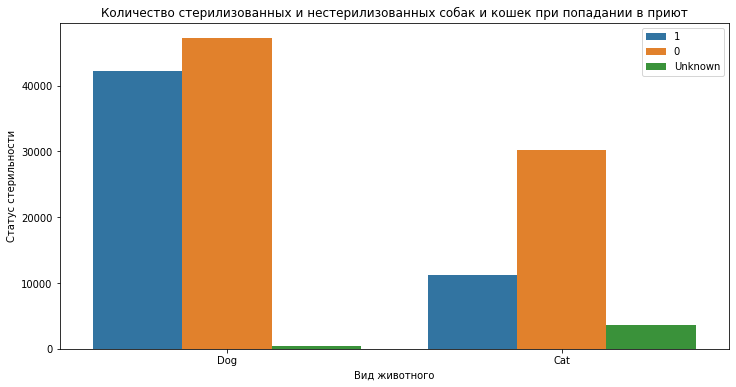

In [57]:
plt.figure (figsize = (12,6))
sns.countplot (data=Analysis, 
x = 'Animal Type_in',
hue = 'Sterill_in')
plt.xlabel ('Вид животного')
plt.ylabel ('Статус стерильности')
plt.title('Количество стерилизованных и нестерилизованных собак и кошек при попадании в приют')
plt.legend(loc = 'upper right')

In [58]:
dog_s = dog[dog['Sterill_in'] =='1']
dog_ns = dog[dog['Sterill_in'] =='0']
cat_s = cat[cat['Sterill_in'] =='1']
cat_ns = cat[cat['Sterill_in'] =='0']

In [59]:
print (dog_s['Sterill_in'].count()/dog['Animal Type_in'].count() * 100, '% стерилизованных собак в приюте')
print (dog_ns['Sterill_in'].count()/dog['Animal Type_in'].count() * 100, '% нестерилизованных собак в приюте')
print (cat_s['Sterill_in'].count()/cat['Animal Type_in'].count() * 100, '% стерилизованных кошек в приюте')
print (cat_ns['Sterill_in'].count()/cat['Animal Type_in'].count() * 100, '% нестерилизованных кошек в приюте')

46.979447326816455 % стерилизованных собак в приюте
52.56852746665479 % нестерилизованных собак в приюте
24.883679709310055 % стерилизованных кошек в приюте
66.95395932113263 % нестерилизованных кошек в приюте


Количество кошек и собак по возрастам

In [27]:
dog['group of age_in'].value_counts()

1-3 years           44015
1-6 months          14523
4-6 years           12719
7-12 months          6855
7-9 years            5884
9+ years             3905
1-6 weeks            1295
Less than 1 week      622
Name: group of age_in, dtype: int64

In [28]:
cat['group of age_in'].value_counts()

1-6 months          15117
1-3 years           11396
1-6 weeks            9989
4-6 years            2366
7-12 months          1687
9+ years             1597
Less than 1 week     1551
7-9 years            1431
Name: group of age_in, dtype: int64

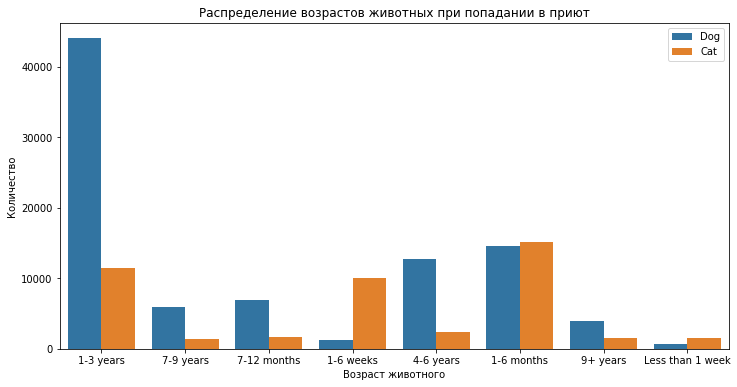

In [30]:
plt.figure(figsize=(12,6)), sns.countplot(data=Analysis, x='group of age_in', hue= 'Animal Type_in') 
plt.legend(loc='upper right') 
plt.xlabel ('Возраст животного')
plt.ylabel ('Количество')
plt.title('Распределение возрастов животных при попадании в приют')
plt.show()

Кондиции собак и кошек при попадании в приют

In [31]:
dog['Intake Condition'].value_counts()

Normal      83728
Injured      3022
Sick         1524
Nursing       934
Aged          388
Other         148
Pregnant       57
Feral           9
Behavior        4
Medical         4
Name: Intake Condition, dtype: int64

In [32]:
cat['Intake Condition'].value_counts()

Normal      38939
Injured      2229
Nursing      2010
Sick         1697
Feral          93
Other          90
Aged           53
Pregnant       22
Medical         1
Name: Intake Condition, dtype: int64

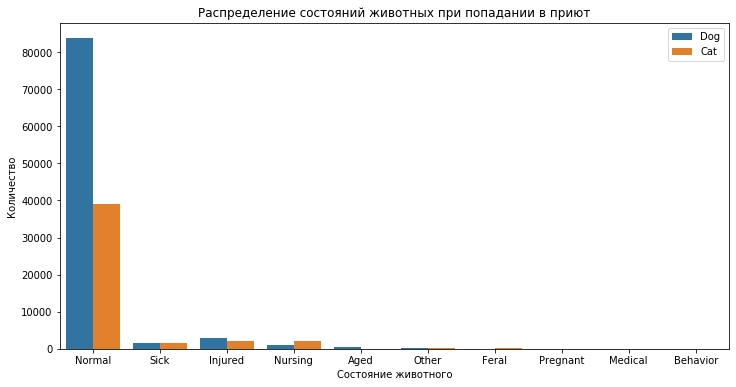

In [34]:
plt.figure(figsize=(12,6)), sns.countplot(data=Analysis, x='Intake Condition', hue= 'Animal Type_in') 
plt.legend(loc='upper right') 
plt.xlabel ('Состояние животного')
plt.ylabel ('Количество')
plt.title('Распределение состояний животных при попадании в приют')
plt.show()

В какой день недели животные чаще попадают в приют

In [41]:
Analysis['DateTime_in'] = pd.to_datetime(Analysis['DateTime_in']) 
Analysis['DateTime_out'] = pd.to_datetime(Analysis['DateTime_out'])
Analysis['Date of Birth'] = pd.to_datetime(Analysis['Date of Birth'])

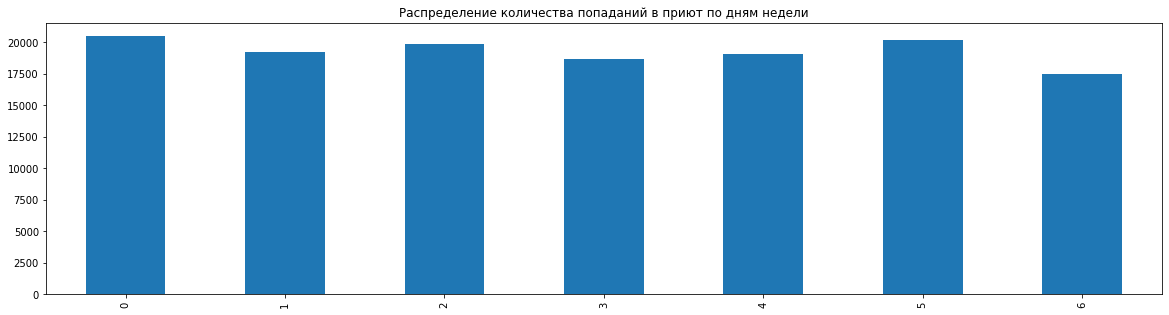

In [53]:
Analysis['DateTime_in'].dt.dayofweek.value_counts().sort_index().plot(kind="bar", figsize=(20,5), title = 'Распределение количества попаданий в приют по дням недели')

In [60]:
Analysis['DateTime_in'].dt.dayofweek.value_counts()

0    20531
5    20183
2    19872
1    19204
4    19035
3    18659
6    17468
Name: DateTime_in, dtype: int64

В какой месяц животные чаще попадают в приют

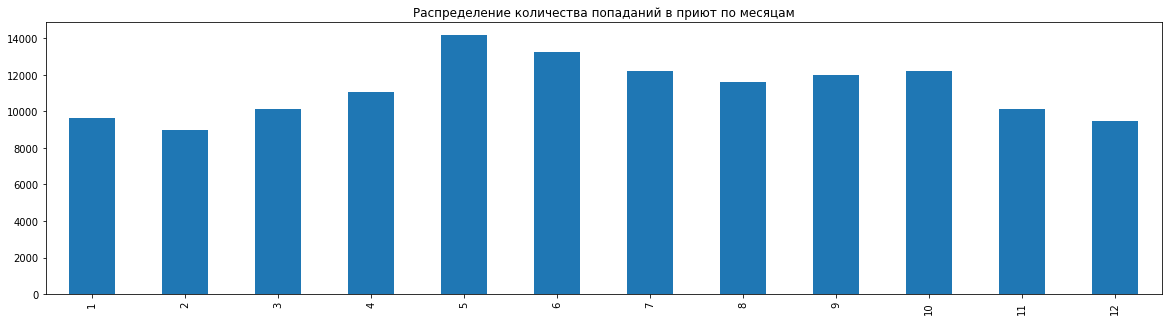

In [54]:
Analysis['DateTime_in'].dt.month.value_counts().sort_index().plot(kind='bar', figsize=(20,5), title = 'Распределение количества попаданий в приют по месяцам')

In [61]:
Analysis['DateTime_in'].dt.month.value_counts()

5     14176
6     13257
10    12230
7     12205
9     11998
8     11605
4     11083
3     10142
11    10110
1      9667
12     9495
2      8984
Name: DateTime_in, dtype: int64

In [62]:
cat['Breed_out'].value_counts().head(5)

Domestic Shorthair Mix      33052
Domestic Shorthair           3657
Domestic Medium Hair Mix     3336
Domestic Longhair Mix        1686
Siamese Mix                  1354
Name: Breed_out, dtype: int64

In [63]:
dog['Breed_out'].value_counts().head(5)

Pit Bull Mix                 13587
Labrador Retriever Mix        9166
Chihuahua Shorthair Mix       7409
German Shepherd Mix           3950
Australian Cattle Dog Mix     1867
Name: Breed_out, dtype: int64

## Вывод:

За 13 лет работы через приют прошло порядка 135 тысяч животных, из них 66,6 % - это собаки и 33,4% - кошки.
Самый распространенный способ попадания - отлов на улицах города, ему было подвержено 66,1% собак и 75,9% кошек. 
Соотношение мужских и женских особей у кошек примерно одинаково, у собак - мужских особей на 10% больше, чем женских. 
При поступлении были стерильными 47,0 % собак и 24,9% кошек. Чаще всего в приют попадают собаки в возрасте от 1 до 3 лет и кошки в возрасте от 1 до 6 месяцев. 
Состояние кошек и собак по прибытию в приют - нормальное. Наибольшее количество попаданий происходит в понедельник и субботу, в май, июнь и октябрь. 
Самые распространенные породы - питбуль у собак и домашняя короткошерстная у кошек.

Распределение собак и кошек по типу выбытия из приюта

In [64]:
dog['Outcome Type'].value_counts()

Adoption           41147
Return to Owner    29900
Transfer           15696
Euthanasia          1927
Rto-Adopt            835
Died                 245
Missing               46
Disposal              22
Name: Outcome Type, dtype: int64

In [65]:
cat['Outcome Type'].value_counts()

Adoption           20726
Transfer           19381
Return to Owner     2437
Euthanasia          1790
Died                 620
Rto-Adopt            100
Disposal              42
Missing               38
Name: Outcome Type, dtype: int64

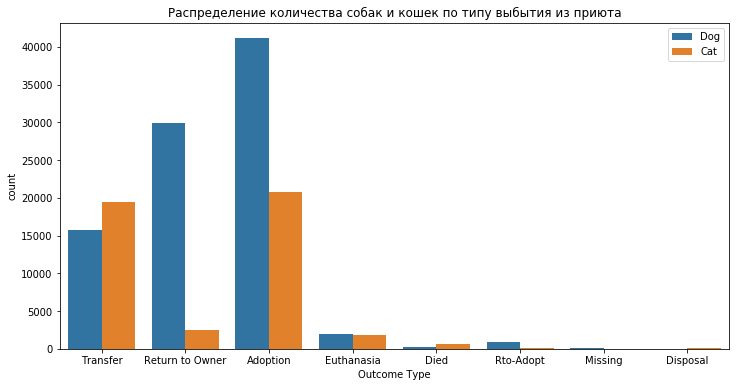

In [66]:
plt.figure (figsize = (12,6))
sns.countplot (data=Analysis, 
x = 'Outcome Type',
hue = 'Animal Type_in')
plt.title('Распределение количества собак и кошек по типу выбытия из приюта')
plt.legend(loc = 'upper right')

In [67]:
dog_out = dog.groupby(['Outcome Type'])['Outcome Type'].count()